# Classification with logistic regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lib.train_test as tt
import lib.read_csv_to_dict as read
from statsmodels.formula.api import logit

Read and split data. At the default of 20% to training set there is perfect separation in the data. 50% is used increase the sample size (and ameliorate perfect separation).

In [2]:
a = read.csv_to_dict('./data/wdbc.csv')

In [3]:
train, test = tt.train_test(a, 'diagnosis', 0.5)

In [4]:
cols1 = train.columns.drop('diagnosis')
cols2 = test.columns.drop('diagnosis')
train[cols1] = train[cols1].apply(pd.to_numeric, errors='coerce')
test[cols2] = test[cols2].apply(pd.to_numeric, errors='coerce')

##### Full model
The full logistic model with all factors.

In [14]:
plain = logit('coded ~ mean_radius + mean_texture + mean_perimeter'
              '+ mean_area + mean_smoothness + mean_compactness'
              '+ mean_concavity + mean_concave_points + mean_symmetry'
              '+ mean_fractal_dimension', train.drop('diagnosis', axis=1))\
              .fit()
probs = np.sort(plain.fittedvalues)
model = logit('coded ~ mean_radius + mean_texture + mean_perimeter'
              '+ mean_area + mean_smoothness + mean_compactness'
              '+ mean_concavity + mean_concave_points + mean_symmetry'
              '+ mean_fractal_dimension', train.drop('diagnosis', axis=1)).cdf(probs)

Optimization terminated successfully.
         Current function value: 0.155150
         Iterations 10


In [15]:
plain.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
==========================================================================
Model:                 Logit               Pseudo R-squared:    0.766     
Dependent Variable:    coded               AIC:                 110.4358  
Date:                  2018-10-20 14:05    BIC:                 150.6131  
No. Observations:      285                 Log-Likelihood:      -44.218   
Df Model:              10                  LL-Null:             -189.11   
Df Residuals:          274                 LLR p-value:         2.2381e-56
Converged:             1.0000              Scale:               1.0000    
No. Iterations:        10.0000                                            
--------------------------------------------------------------------------
                        Coef.   Std.Err.    z    P>|z|    [0.025   0.975] 
--------------------------------------------------------------------------
Intercept              -11.6525  14.8739 -0.7834 0.4334  -40.8047  17.4997
mean_radius             -2.7240   5.3576 -0.5084 0.6111  -13.2247   7.7767
mean_texture             0.3140   0.0882  3.5612 0.0004    0.1412   0.4868
mean_perimeter           0.1455   0.7543  0.1929 0.8470   -1.3328   1.6238
mean_area                0.0306   0.0187  1.6360 0.1018   -0.0061   0.0672
mean_smoothness         81.9573  38.9354  2.1050 0.0353    5.6452 158.2693
mean_compactness       -18.1675  22.6455 -0.8023 0.4224  -62.5518  26.2168
mean_concavity          28.1274  14.8179  1.8982 0.0577   -0.9151  57.1699
mean_concave_points     26.4135  38.4656  0.6867 0.4923  -48.9777 101.8048
mean_symmetry           18.7322  12.5192  1.4963 0.1346   -5.8050  43.2695
mean_fractal_dimension -31.4010 100.5305 -0.3124 0.7548 -228.4372 165.6351
==========================================================================

"""

In [7]:
# plain.pred_table()

In [8]:
# plain.wald_test_terms()
# np.exp(plain.params)

In [9]:
plain2 = logit('coded ~ mean_texture + mean_area' 
               '+ mean_smoothness + mean_concavity ', 
               train.drop('diagnosis', axis=1)).fit()
probs2 = np.sort(plain2.fittedvalues)
model2 = logit('coded ~ mean_texture + mean_area' 
               '+ mean_smoothness + mean_concavity', 
               train.drop('diagnosis', axis=1)).cdf(probs2)

Optimization terminated successfully.
         Current function value: 0.164548
         Iterations 9


##### Reduced model

In [10]:
plain2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:               Logit            Pseudo R-squared: 0.752     
Dependent Variable:  coded            AIC:              103.7926  
Date:                2018-10-20 12:06 BIC:              122.0551  
No. Observations:    285              Log-Likelihood:   -46.896   
Df Model:            4                LL-Null:          -189.11   
Df Residuals:        280              LLR p-value:      2.4720e-60
Converged:           1.0000           Scale:            1.0000    
No. Iterations:      9.0000                                       
------------------------------------------------------------------
                 Coef.   Std.Err.    z    P>|z|   [0.025   0.975] 
------------------------------------------------------------------
Intercept       -23.0329   4.7414 -4.8579 0.0000 -32.3258 -13.7400
mean_texture      0.3247   0.0863  3.7606 0.0002   0.1555   0.4939
mean_area         0.0112   0.0020  5.7425 0.0000   0.0074   0.0151
mean_smoothness  70.2750  29.0158  2.4220 0.0154  13.4052 127.1449
mean_concavity   28.9411   6.4945  4.4562 0.0000  16.2120  41.6702
==================================================================

"""

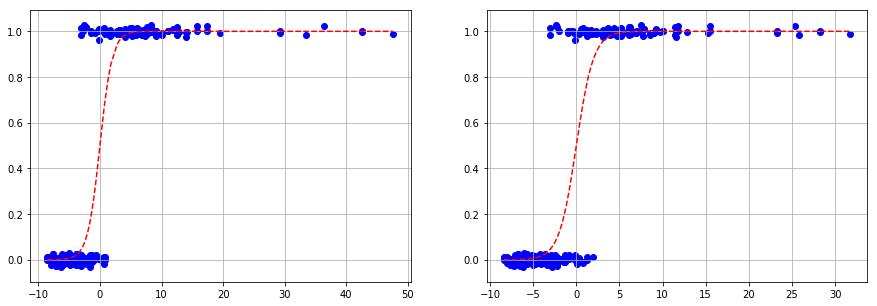

In [11]:
jitter = np.random.randn(285)
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.scatter(plain.fittedvalues, train['coded'] + jitter/85, c='b')
plt.grid()
plt.plot(probs, model, 'r--')
plt.subplot(122)
plt.scatter(plain2.fittedvalues, train['coded'] + jitter/85, c='b')
plt.grid()
plt.plot(probs2, model2, 'r--')

plt.show()